In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from scipy.constants import c, h, pi, k

In [4]:
lmbda1 = np.logspace(np.log10(3.5e-7), np.log10(7e-7), 900)
# print(lmbda1)
lmbda2 = np.logspace(-8, -2, 900)

In [5]:
T = 5780 #Kelvin

In [6]:
def Planck(lmbda1):
    return ((2*h*c**2)/lmbda1**5)*(1/(np.exp(h*c/(k*T*lmbda1))-1))

In [7]:
plancks = []
for lmbda in lmbda1:
    planck = Planck(lmbda)
    plancks.append(planck)

In [8]:
plancks2 = []
for lmbda in lmbda2:
    planck = Planck(lmbda)
    plancks2.append(planck)

The 2 green lines represent the range for PAR


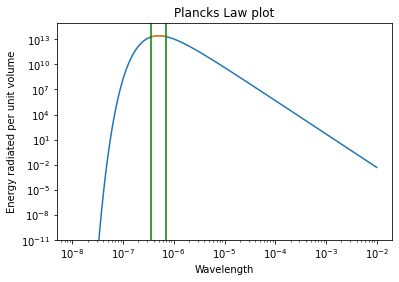

In [9]:
plt.plot(lmbda2, plancks2)
plt.plot(lmbda1, plancks)
#plt.scatter(lmbda1, plancks)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1.e-11,1.e+15)
plt.xlabel('Wavelength')
plt.ylabel('Energy radiated per unit volume')
plt.title('Plancks Law plot')
plt.axvline(x=3.5e-7, c='g')
plt.axvline(x=7e-7,  c='g')
comment1 = 'The 2 green lines represent the range for PAR'
print(comment1)
plt.savefig('par.png')

In [10]:
IntegratedIntensity = 0
for n in range(1, len(lmbda1)):
    dlmbda = lmbda1[n] - lmbda1[n-1]
    IntegratedIntensity = IntegratedIntensity + plancks[n]*dlmbda

In [11]:
print(IntegratedIntensity)

8437021.096915571


In [12]:
Rstar = 696340e3

In [13]:
def PARLuminosity(IntegratedIntensity):
    return 4*(pi**2)*(Rstar**2)*IntegratedIntensity

In [14]:
print(PARLuminosity(IntegratedIntensity))

1.615070773270508e+26


In [15]:
SolarLuminosity = 3.827e26
Test1 = PARLuminosity(IntegratedIntensity)/SolarLuminosity
print('The ratio of calculated solar luminosity to our calculation is:', Test1)

The ratio of calculated solar luminosity to our calculation is: 0.4220200609538824


In [16]:
Distance = 149597871e3

In [17]:
FluxPAR = (PARLuminosity(IntegratedIntensity))/(4*pi*Distance**2)

In [18]:
print(FluxPAR, 'Watts per metre squared')

574.289489817177 Watts per metre squared


In [19]:
FluxConversion = 2.1*FluxPAR
print(FluxConversion, 'Micro moles metre squared per second')

1206.0079286160717 Micro moles metre squared per second


In [20]:
if int(FluxConversion) in range(500, 1500):
    print('Enough Flux for photosynthesis')
else:
    print('Not enough Flux to satisfy PAR')

Enough Flux for photosynthesis
